In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df = pd.read_csv('study_performance.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
print(df.isnull().sum())

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
label_encoders = {}
for col in df.columns[df.dtypes == 'object']:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [ ]:
df.describe()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.482000,2.174000,2.486000,0.645000,0.642000,66.08900,69.169000,68.054000
std,0.499926,1.157179,1.829522,0.478753,0.479652,15.16308,14.600192,15.195657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,57.00000,59.000000,57.750000
50%,0.000000,2.000000,2.000000,1.000000,1.000000,66.00000,70.000000,69.000000
75%,1.000000,3.000000,4.000000,1.000000,1.000000,77.00000,79.000000,79.000000
max,1.000000,4.000000,5.000000,1.000000,1.000000,100.00000,100.000000,100.000000


In [ ]:
corr_matrix = df.corr()
print(corr_matrix)

                               gender  race_ethnicity  \
gender                       1.000000       -0.001502   
race_ethnicity              -0.001502        1.000000   
parental_level_of_education  0.001913       -0.031946   
lunch                        0.021372        0.046563   
test_preparation_course     -0.006028       -0.017508   
math_score                   0.167982        0.216415   
reading_score               -0.244313        0.145253   
writing_score               -0.301225        0.165691   

                             parental_level_of_education     lunch  \
gender                                          0.001913  0.021372   
race_ethnicity                                 -0.031946  0.046563   
parental_level_of_education                     1.000000  0.006320   
lunch                                           0.006320  1.000000   
test_preparation_course                        -0.023968  0.017044   
math_score                                     -0.068279  0.350877

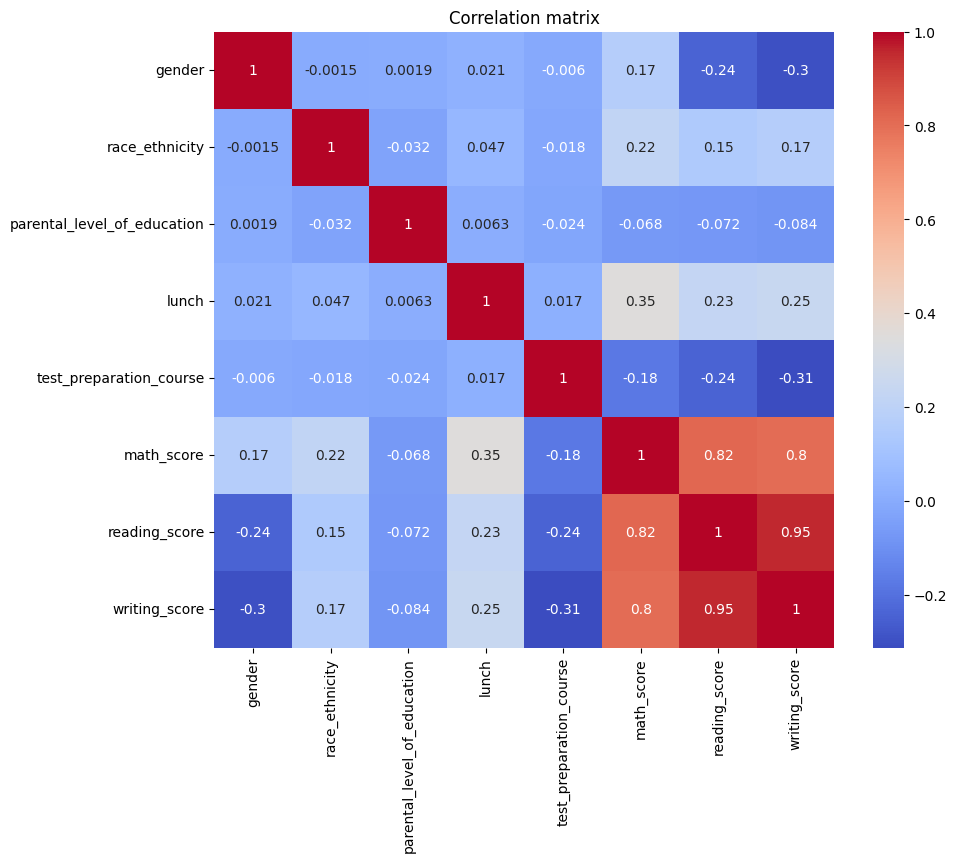

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True , cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

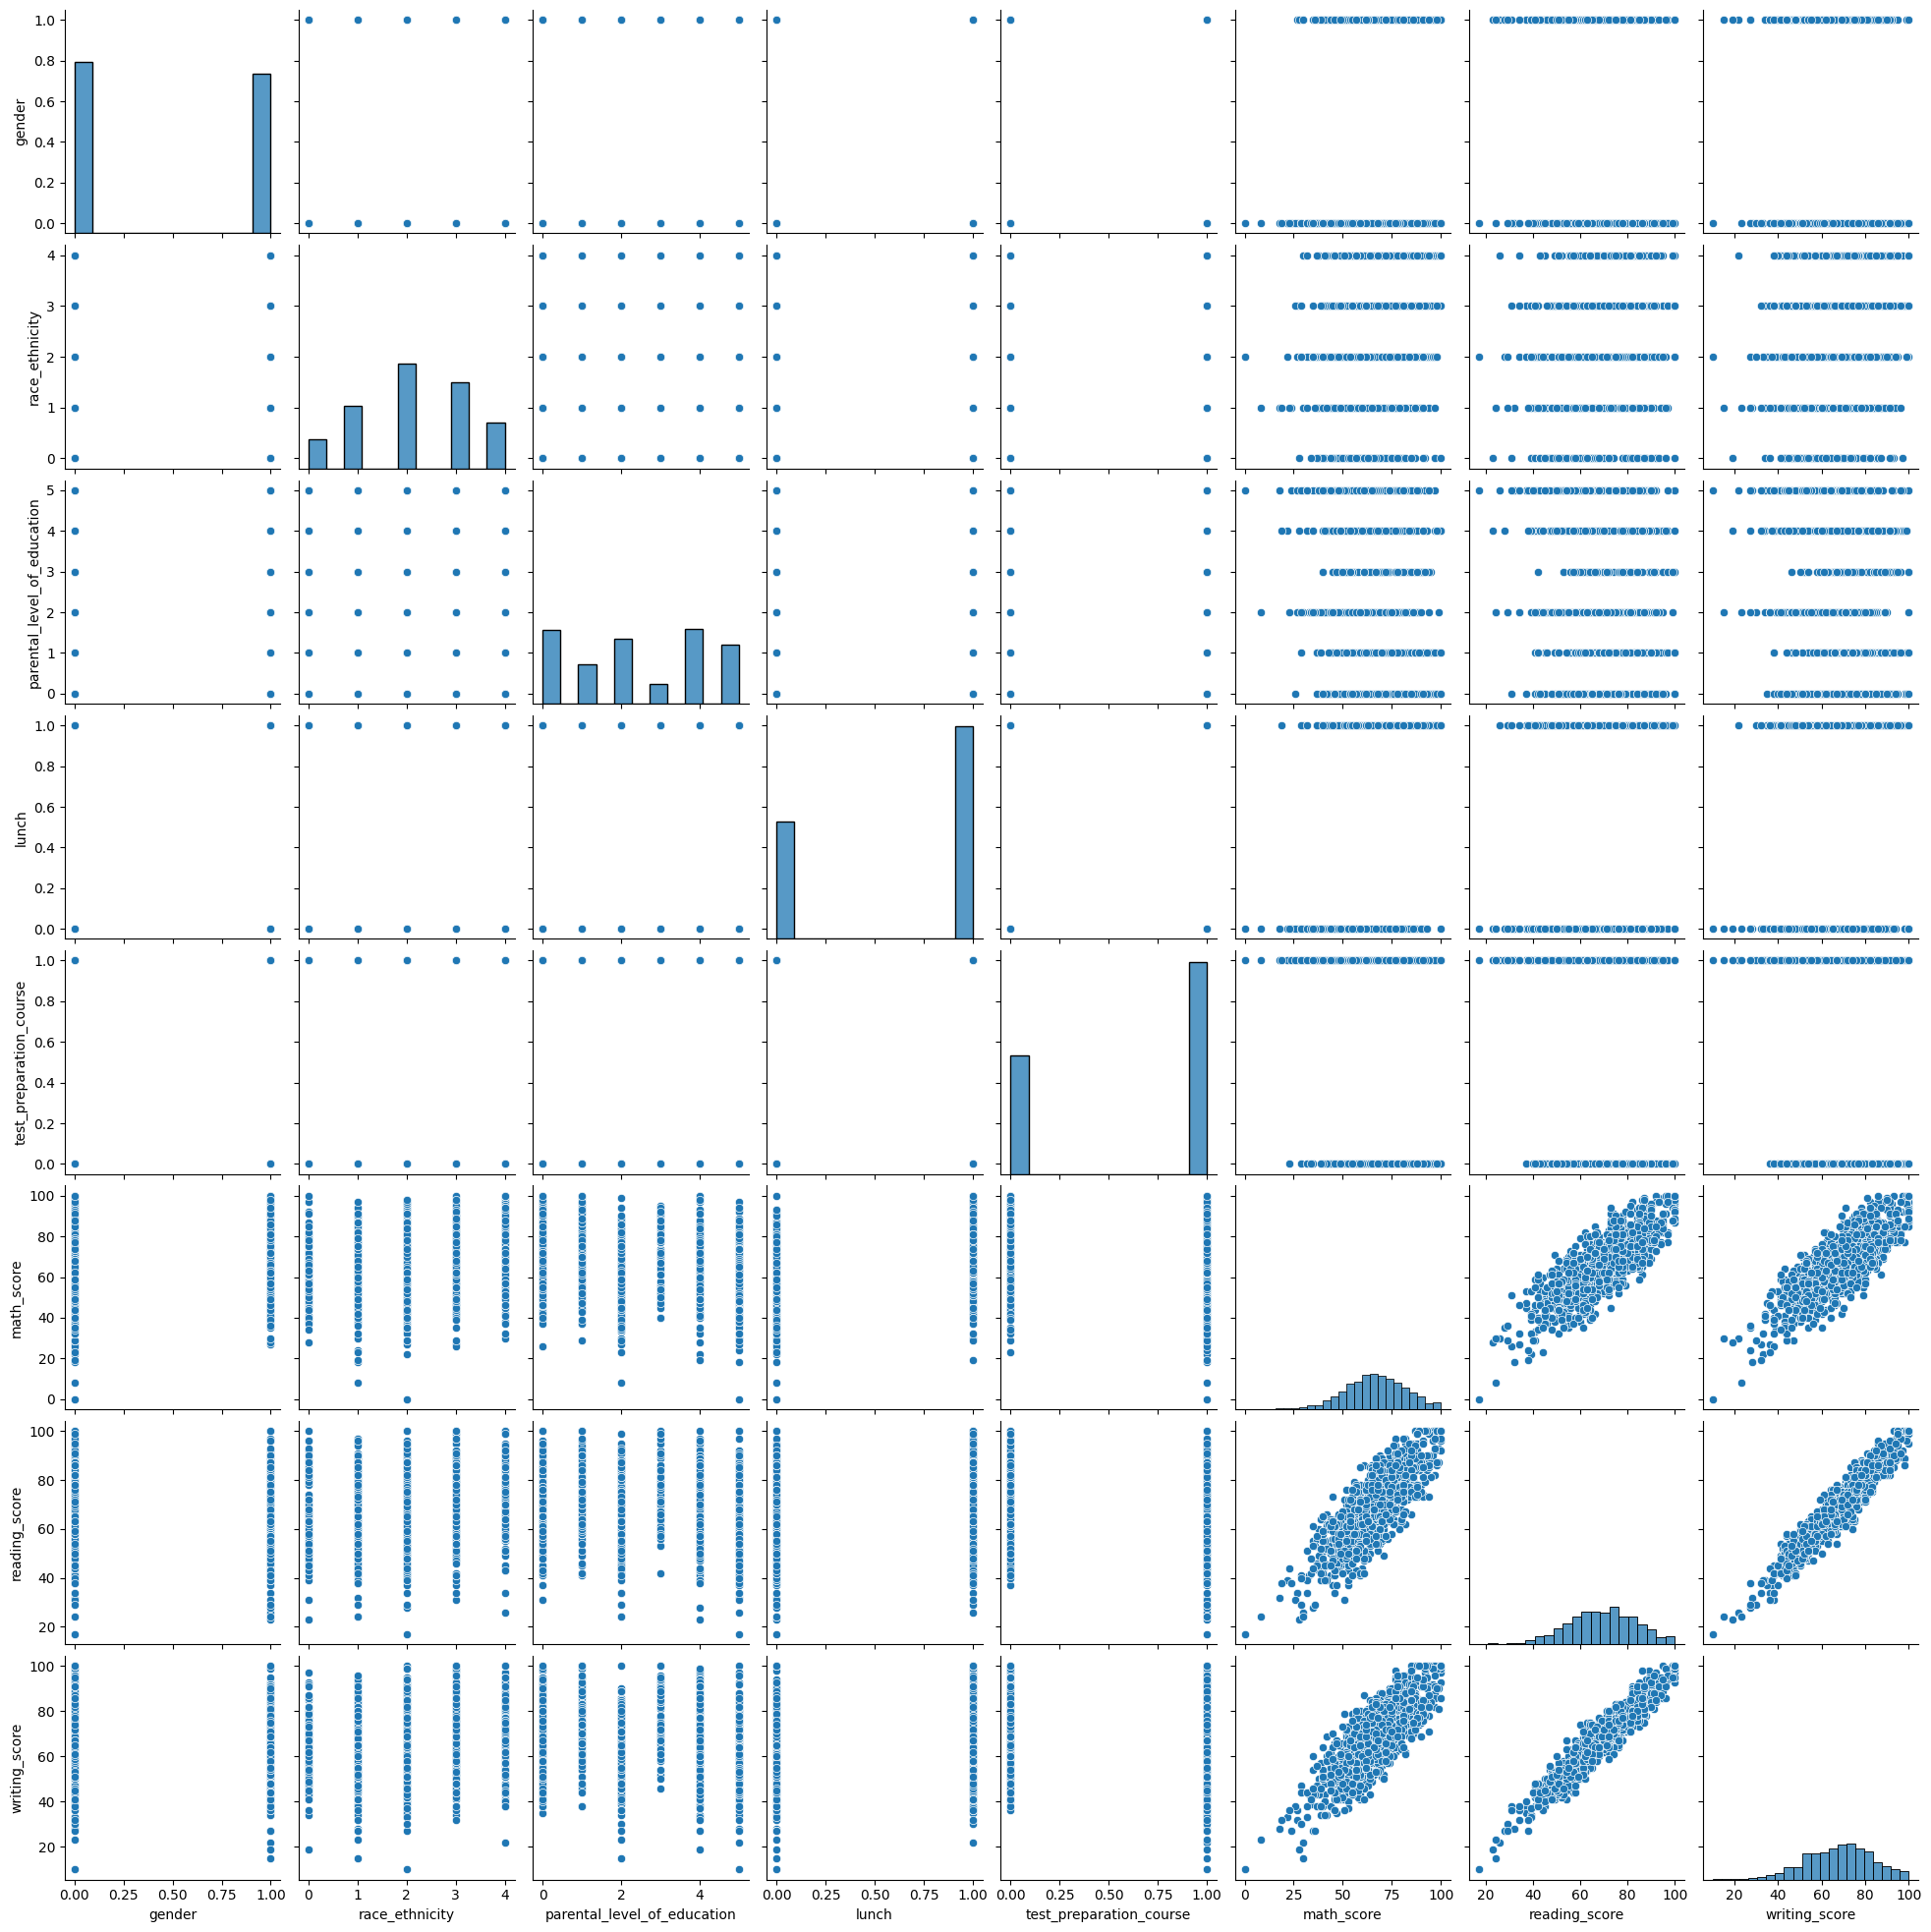

In [ ]:
sns.pairplot(df)
plt.show()

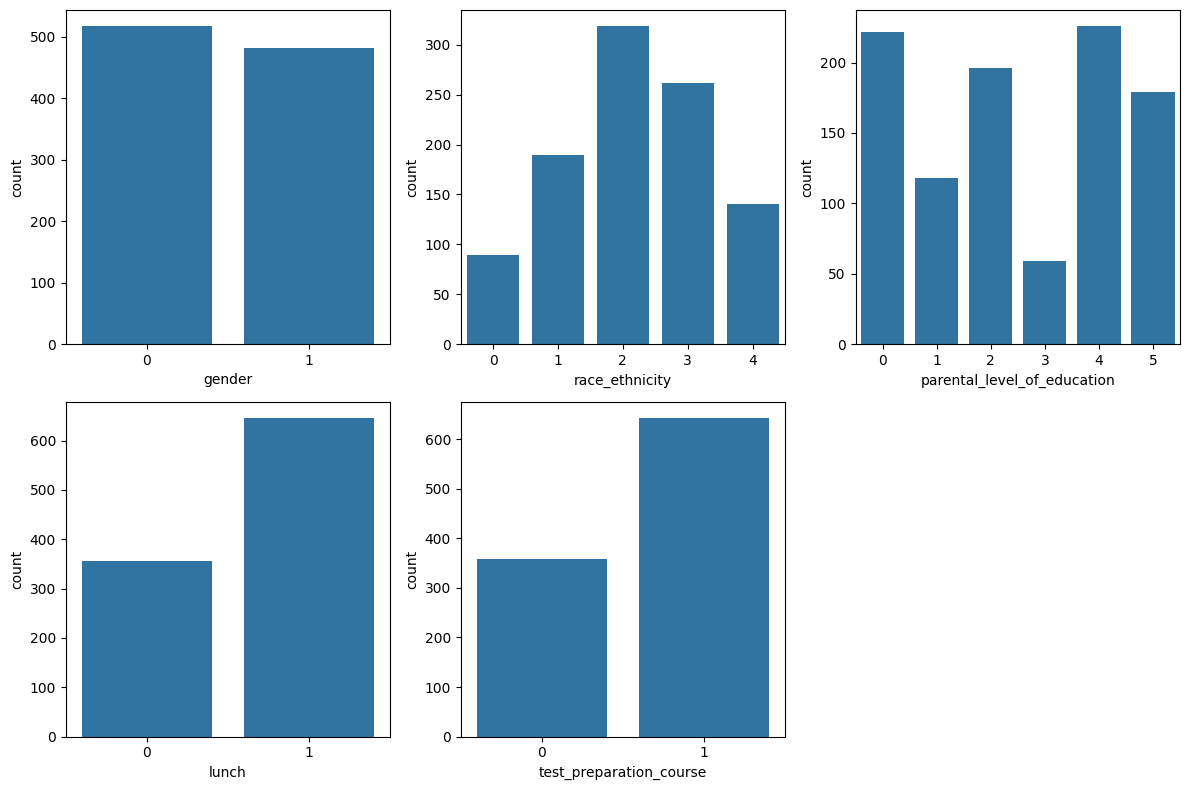

In [ ]:
plt.figure(figsize=(12, 8))
for i , column in enumerate(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=column, data=df)
plt.tight_layout()
plt.show()

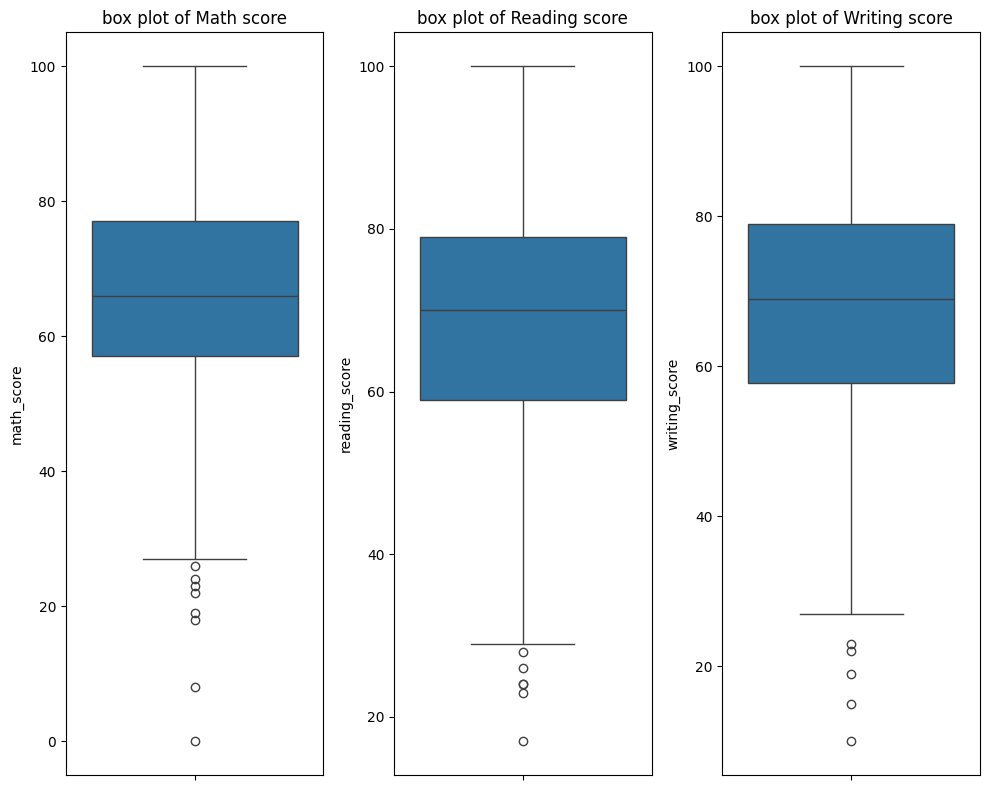

In [ ]:
plt.figure(figsize=(10,8))
for i , column in enumerate(['math_score', 'reading_score', 'writing_score']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=column, data=df)
    plt.title(f'box plot of {column.replace("_"," ").capitalize()}')
plt.tight_layout()
plt.show()

In [ ]:
X = df[['reading_score', 'writing_score']]
y = df['math_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = linear_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 7.351308782530512
Root Mean Squared Error: 8.788798451027851


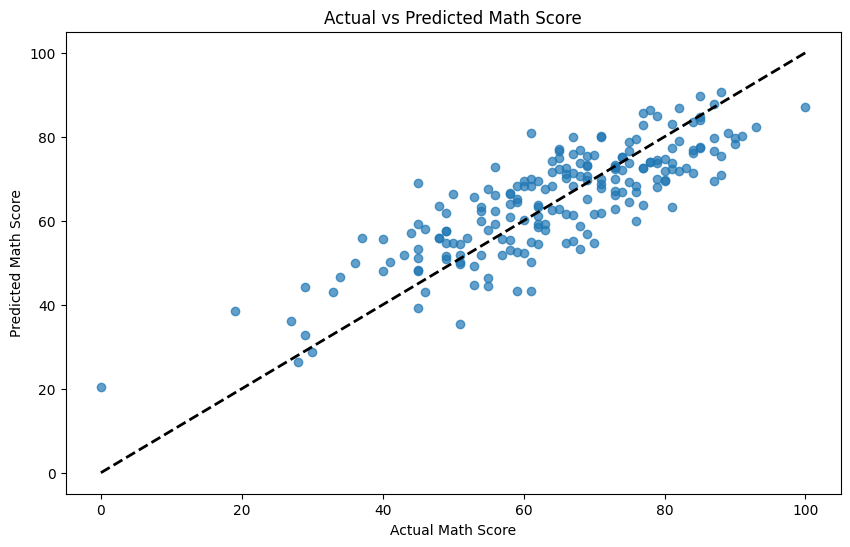

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual vs Predicted Math Score')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [ ]:
# Logistic Regression to predict whether a student scored above average in math
df['high_math_score'] = (df['math_score'] > df['math_score'].median()).astype(int)
X = df[['reading_score', 'writing_score']]
y = df['high_math_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logistic_model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.82
Confusion Matrix:
[[83 21]
 [15 81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       104
           1       0.79      0.84      0.82        96

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



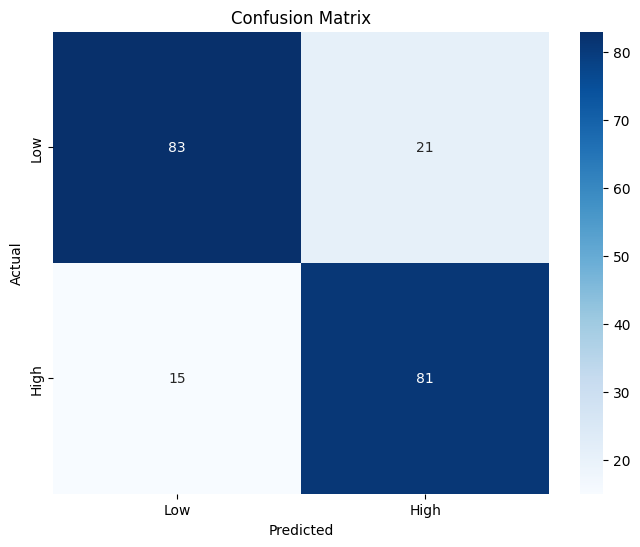

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()